In [1]:
using Pkg
Pkg.activate("..")

using Flux

using CSV
using DataFrames

using Random
Random.seed!(42)

df = CSV.read("data1.csv", DataFrame)
x = Matrix(df[:, 1:2])
x = [x[i, :] for i in 1:size(x, 1)]
y = df[:, 3]

X = hcat(x...)
y_train = Flux.onehotbatch(y, unique(y))
y_train = Flux.unstack(y_train',1)

  Activating project at `C:\Users\Lenovo\Desktop\SP\LaplaceRedux.jl\dev`


100-element Vector{Vector{Bool}}:
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 ⋮
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]

In [2]:
data = zip(x,y_train)
n_hidden = 3
D = size(X,1)
out_dim = length(unique(y))
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, out_dim)
)  
loss(x, y) = Flux.Losses.logitcrossentropy(nn(x), y)

loss (generic function with 1 method)

In [3]:
using Flux.Optimise: update!, Adam
using Statistics
opt = Adam()
epochs = 200
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))
show_every = epochs/10

for epoch = 1:epochs
    for d in data
        gs = gradient(Flux.params(nn)) do
            l = loss(d...)
        end
        update!(opt, Flux.params(nn), gs)
    end
    if epoch % show_every == 0
        println("Epoch " * string(epoch))
        @show avg_loss(data)
    end
end

Epoch 20
avg_loss(data) = 0.8426135906441796
Epoch 40
avg_loss(data) = 0.4255640239609477
Epoch 60
avg_loss(data) = 0.22512104221820584
Epoch 80
avg_loss(data) = 0.12179543499437052
Epoch 100
avg_loss(data) = 0.0667523620152209
Epoch 120
avg_loss(data) = 0.037058148578010375
Epoch 140
avg_loss(data) = 0.02091532768983873
Epoch 160
avg_loss(data) = 0.011952221811428736
Epoch 180
avg_loss(data) = 0.00688858560977063
Epoch 200
avg_loss(data) = 0.003997510054539408


In [4]:
using LaplaceRedux

# GGN is used by default now
# Laplace(nn; likelihood=:classification, backend=:EmpiricalFisher) - to use Empirical Fisher as a backend 
la = Laplace(nn; likelihood=:classification) 
fit!(la, data)
optimize_prior!(la; verbose=true, n_steps=100)

loss(exp.(logP₀), exp.(logσ)) = 76.61747532990222
Log likelihood: -0.39975100545394066
Log det ratio: 6.0729391408385
Scatter: 146.36250950805808
loss(exp.(logP₀), exp.(logσ)) = 39.215318630653435
Log likelihood: -0.39975100545394066
Log det ratio: 9.13037905155808
Scatter: 68.5007561988409
loss(exp.(logP₀), exp.(logσ)) = 26.42230686554804
Log likelihood: -0.39975100545394066
Log det ratio: 11.82142210370759
Scatter: 40.22368961648061
loss(exp.(logP₀), exp.(logσ)) = 21.400005838258284
Log likelihood: -0.39975100545394066
Log det ratio: 13.902935170879005
Scatter: 28.09757449472968
loss(exp.(logP₀), exp.(logσ)) = 19.114309679424107
Log likelihood: -0.39975100545394066
Log det ratio: 15.455160437177042
Scatter: 21.97395691076329
loss(exp.(logP₀), exp.(logσ)) = 17.924875210688104
Log likelihood: -0.39975100545394066
Log det ratio: 16.632869822802697
Scatter: 18.417378587665628
loss(exp.(logP₀), exp.(logσ)) = 17.234192375928746

[ Info: Iteration 10: P₀=0.3848888090532633, σ=1.0
[ Info: Iteration 20: P₀=0.18013611929199855, σ=1.0
[ Info: Iteration 30: P₀=0.10577604910062696, σ=1.0
[ Info: Iteration 40: P₀=0.07388806068514735, σ=1.0
[ Info: Iteration 50: P₀=0.05778481206695744, σ=1.0
[ Info: Iteration 60: P₀=0.04843209462802649, σ=1.0
[ Info: Iteration 70: P₀=0.04235776304937732, σ=1.0



Log likelihood: -0.39975100545394066
Log det ratio: 17.561403512587262
Scatter: 16.107479228362347
loss(exp.(logP₀), exp.(logσ)) = 16.799371563955457
Log likelihood: -0.39975100545394066
Log det ratio: 18.32173944966741
Scatter: 14.47750166733562
loss(exp.(logP₀), exp.(logσ)) = 16.5104299759893
Log likelihood: -0.39975100545394066
Log det ratio: 18.962052762049467
Scatter: 13.259305179021258
loss(exp.(logP₀), exp.(logσ)) = 16.31192054270441
Log likelihood: -0.39975100545394066
Log det ratio: 19.5107158632934
Scatter: 12.313623211207538


[ Info: Iteration 80: P₀=0.03807141865451998, σ=1.0
[ Info: Iteration 90: P₀=0.034867933027250324, σ=1.0
[ Info: Iteration 100: P₀=0.03238107756434279, σ=1.0


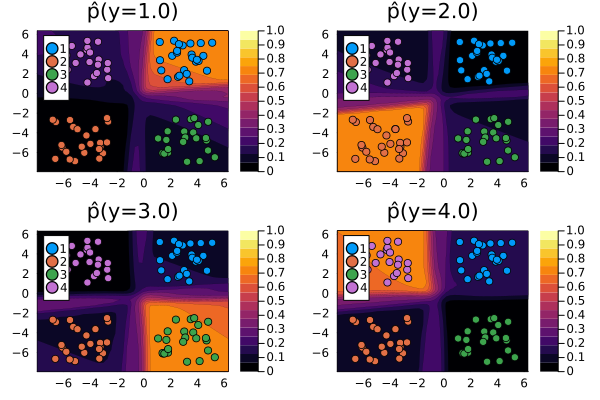

In [5]:
using Plots
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1))
    push!(plt_list, plt)
end
plot(plt_list...)

In [6]:
predictions_probit = reduce(hcat, predict(la, X))
predictions_probit = reshape(predictions_probit, 4, 100)

4×100 Matrix{Float64}:
 0.717967   0.718385   0.708245   …  0.176825   0.145062   0.165499
 0.0313425  0.0312279  0.0329713     0.106553   0.103328   0.0934414
 0.115953   0.11588    0.119338      0.0316413  0.0308606  0.028654
 0.134737   0.134508   0.139446      0.68498    0.72075    0.712405

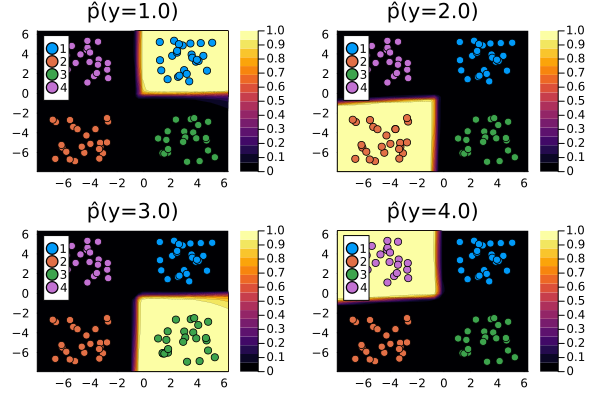

In [7]:
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1), link_approx=:plugin)
    push!(plt_list, plt)
end
plot(plt_list...)

In [8]:
predictions_plugin = reduce(hcat, predict(la, X, link_approx=:plugin))
predictions_plugin = reshape(predictions_plugin, 4, 100)

4×100 Matrix{Float64}:
 0.998087     0.998134     …  0.00109876  0.00147077   0.00269684
 4.42818e-7   4.23923e-7      0.00110854  0.000838535  0.0004677
 0.000583781  0.000565867     5.7031e-6   5.06372e-6   3.93886e-6
 0.00132919   0.00129976      0.997787    0.997686     0.996832

In [9]:
@show la.posterior.H

la.posterior.H = [2.9271987201224556 -1.7965158223362034 -0.0016245830235588191 7.273562579275345e-5 -0.00012093632100554556 -2.929937183129288e-5 -0.2500739742379934 9.481642695571595e-5 -2.4037738672203374e-5 -0.008529931072537082 0.15200532462214658 -0.14064458967208449 -0.11587715895789744 -0.21989373685658697 0.04390814508896483 0.03728970581063283 0.020591093958580508 0.06936939450646167 0.0871173842198019 0.04729731827585991 0.027367050076656966 0.05973054183935701 -0.19127369013906267 0.07658578676442662 0.05495736153527904; -1.7965158223362034 1.4113218778861263 7.27356286504156e-5 -0.0001910576236585789 -2.9299366060893944e-5 -0.0004621506350323424 0.18718186382875196 -0.00010882237055772109 -5.9478127092811964e-5 0.0006357530566692212 -0.2222796965449521 0.029360785488649132 -0.004759125766564537 0.10162961347215524 -0.05255463871250921 0.002396455950552688 0.01800907931084777 -0.000947416336518209 0.001726916759342148 0.10264100376194729 0.02414126956037734 -0.1510147277393

25×25 Matrix{Float64}:
  2.9272       -1.79652      -0.00162458   …   0.0765858     0.0549574
 -1.79652       1.41132       7.27356e-5       0.0061501     0.109751
 -0.00162458    7.27356e-5    6.01899e-5      -0.000250404  -0.00034164
  7.27356e-5   -0.000191058   1.96234e-5      -0.000105789   3.81341e-5
 -0.000120936  -2.92994e-5   -1.26812e-7       1.63097e-5   -0.000102022
 -2.92994e-5   -0.000462151  -1.02788e-7   …  -0.000513175  -0.000364156
 -0.250074      0.187182      9.48164e-5       0.0173263     0.0115612
  9.48164e-5   -0.000108822   1.1764e-5       -0.00011507    0.000166556
 -2.40377e-5   -5.94781e-5   -2.58475e-8       0.000115213  -0.000105525
 -0.00852993    0.000635753   1.95029e-5      -0.016089     -0.0150152
  0.152005     -0.22228       0.000117891  …  -0.0202806    -0.0919713
 -0.140645      0.0293608     0.000120403     -0.0395204    -0.0411518
 -0.115877     -0.00475913    0.000408306     -0.159138     -0.0837713
 -0.219894      0.10163       0.000289074    